In [1]:
import os 
os.getcwd()

'c:\\Users\\YugalSharma\\Desktop\\pandas tutorial'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel(r"C:\Users\YugalSharma\Desktop\pandas tutorial\Superstore data.xls")


In [10]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
1       2  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
2       3  CA-2013-138688 2013-06-13 2013-06-17    Second Class    DV-13045   
3       4  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
4       5  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [11]:
print(df.shape)

(9994, 21)


In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [17]:
print(df.head(10))

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
1       2  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
2       3  CA-2013-138688 2013-06-13 2013-06-17    Second Class    DV-13045   
3       4  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
4       5  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
5       6  CA-2011-115812 2011-06-09 2011-06-14  Standard Class    BH-11710   
6       7  CA-2011-115812 2011-06-09 2011-06-14  Standard Class    BH-11710   
7       8  CA-2011-115812 2011-06-09 2011-06-14  Standard Class    BH-11710   
8       9  CA-2011-115812 2011-06-09 2011-06-14  Standard Class    BH-11710   
9      10  CA-2011-115812 2011-06-09 2011-06-14  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderso

In [18]:
df=df.drop_duplicates()

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [22]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [23]:
df['Profit Margin']=df['Profit']/df['Sales']*100

In [29]:
category_sales=df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


In [ ]:
subcategory_sales=df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(subcategory_sales) # Groupby and aggregated values

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64


In [ ]:
regional_stats=df.groupby(['Country','City','Region','Segment','Sub-Category']).agg({
    'Sales':'sum',
    'Quantity':'mean'
    })


print(regional_stats.head(10))  # Advance group by with many fields



                                                         Sales  Quantity
Country       City     Region  Segment   Sub-Category                   
United States Aberdeen Central Consumer  Supplies       25.500  3.000000
              Abilene  Central Consumer  Appliances      1.392  2.000000
              Akron    East    Consumer  Accessories    71.976  3.000000
                                         Art            22.608  3.500000
                                         Binders        47.166  2.750000
                                         Furnishings   149.232  3.000000
                                         Paper          49.200  3.666667
                                         Phones        323.982  3.000000
                                         Storage       221.024  2.000000
                               Corporate Accessories   279.960  5.000000


In [54]:
regional_stats = df.groupby(['Country', 'City', 'Region', 'Segment', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Quantity': 'mean'  # Changed from 'mean' to 'sum' (usually more meaningful)
}).reset_index()

print(regional_stats)

            Country      City   Region      Segment Sub-Category    Sales  \
0     United States  Aberdeen  Central     Consumer     Supplies   25.500   
1     United States   Abilene  Central     Consumer   Appliances    1.392   
2     United States     Akron     East     Consumer  Accessories   71.976   
3     United States     Akron     East     Consumer          Art   22.608   
4     United States     Akron     East     Consumer      Binders   47.166   
...             ...       ...      ...          ...          ...      ...   
4436  United States   Yucaipa     West    Corporate          Art   50.800   
4437  United States      Yuma     West    Corporate  Accessories  185.528   
4438  United States      Yuma     West    Corporate          Art   10.496   
4439  United States      Yuma     West  Home Office      Binders   44.856   
4440  United States      Yuma     West  Home Office     Machines  599.985   

      Quantity  
0         3.00  
1         2.00  
2         3.00  
3      

In [53]:
# df.set_index('Order Date',inplace=False)

monthly_sales=df[['Sales','Quantity']].resample('ME').sum()
print(monthly_sales)

                  Sales  Quantity
Order Date                       
2011-01-31   13946.2290       282
2011-02-28    4810.5580       161
2011-03-31   55691.0090       585
2011-04-30   28295.3450       536
2011-05-31   23648.2870       466
2011-06-30   34595.1276       521
2011-07-31   33946.3930       550
2011-08-31   27909.4685       609
2011-09-30   81777.3508      1000
2011-10-31   31453.3930       573
2011-11-30   78628.7167      1219
2011-12-31   69545.6205      1079
2012-01-31   18174.0756       236
2012-02-29   12210.8670       248
2012-03-31   38466.7960       506
2012-04-30   34195.2085       543
2012-05-31   30131.6865       575
2012-06-30   24797.2920       486
2012-07-31   28765.3250       557
2012-08-31   36898.3322       598
2012-09-30   64595.9180      1086
2012-10-31   31404.9235       631
2012-11-30   75972.5635      1310
2012-12-31   74919.5212      1203
2013-01-31   18542.4910       358
2013-02-28   22867.7110       299
2013-03-31   51186.2170       575
2013-04-30   3

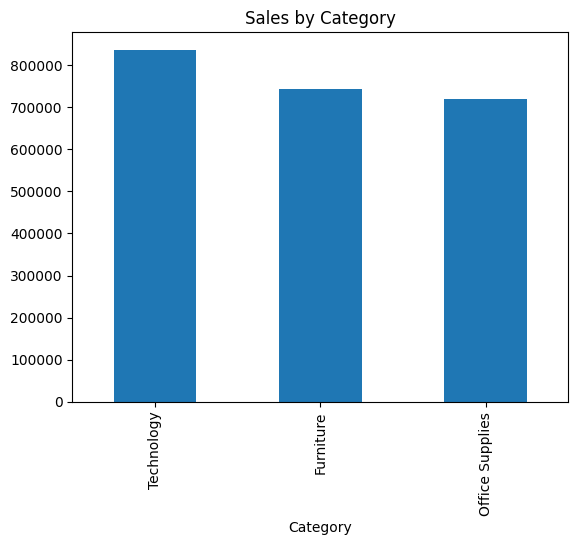

In [55]:
category_sales.plot(kind='bar');plt.title('Sales by Category');plt.show()

In [ ]:
regional_stats['Sales'].plot(kind='pie',autopct='%1.1f%%');plt.show()